In [1]:
import l

SSO 2015-01-01 2023-01-01


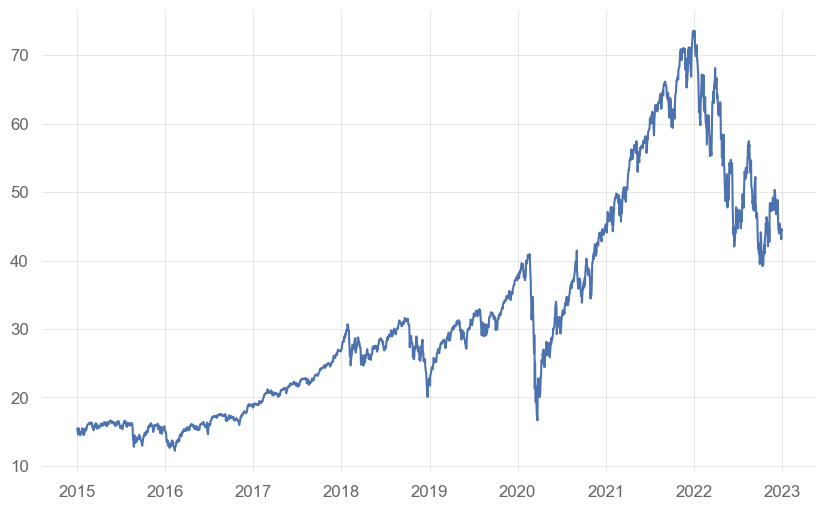

In [7]:
import matplotlib.pyplot as plt

security_name = 'SSO'
start_date = '2015-01-01'
end_date = '2023-01-01'

mystrategy = l.Strategy(security_name, start_date, end_date)
print(mystrategy.security_name, mystrategy.start, mystrategy.end)

result = mystrategy.download_data()
mypsar = mystrategy.get_psar(result)
plt.plot(result.index, result.Close, label='Close')


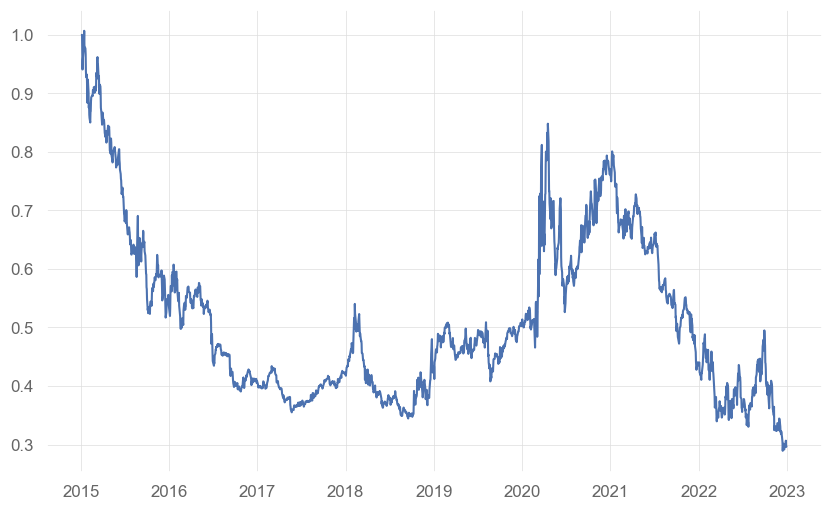

In [8]:
signal = mystrategy.get_signals(result,  mypsar)
result["Signal"] = signal

result = mystrategy.get_equity_curve(result)
plt.plot(result['Cumulative Returns'])


In [2]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 23.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [11]:
result

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Signal,Daily Returns,Cumulative Returns,Benchmark
Date,,,,,,,,,,,,
2015-01-02 00:00:00-05:00,15.562255,15.642907,15.236035,15.425026,21171200,0.0,0.0,0.0,0,NaN,NaN,100.000000
2015-01-05 00:00:00-05:00,15.234830,15.262517,14.812310,14.862867,45052800,0.0,0.0,0.0,0,-0.000000,1.000000,96.355542
2015-01-06 00:00:00-05:00,14.923057,15.013340,14.443959,14.595634,58580800,0.0,0.0,0.0,-1,-0.000000,1.000000,94.623073
2015-01-07 00:00:00-05:00,14.824349,15.008525,14.742493,14.959170,30749600,0.0,0.0,0.0,-1,-0.024907,0.975093,96.979872
2015-01-08 00:00:00-05:00,15.197516,15.515309,15.197516,15.485215,29434400,0.0,0.0,0.0,-1,-0.035165,0.940803,100.390205
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,43.830555,44.599162,43.451241,44.569218,5069600,0.0,0.0,0.0,-1,-0.011096,0.296695,288.940958
2022-12-27 00:00:00-05:00,44.539271,44.619128,43.810593,44.199886,2516300,0.0,0.0,0.0,-1,0.008287,0.299154,286.546593
2022-12-28 00:00:00-05:00,44.189907,44.649074,43.051970,43.101879,4785900,0.0,0.0,0.0,-1,0.024842,0.306585,279.428244


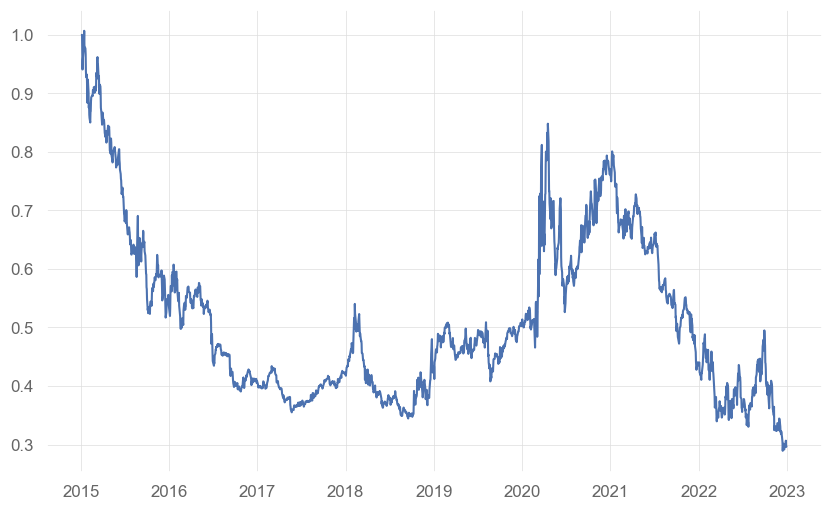

In [12]:
import matplotlib.pyplot as plt

#plt.plot(l.result['Benchmark'])
plt.plot(result['Cumulative Returns'])



In [13]:
import quantstats as qs

qs.reports.html(result['Cumulative Returns'], output= "report_strategy.html")

In [14]:
import webbrowser

webbrowser.open_new_tab("report_strategy.html")

True

In [15]:
!open report_strategy.html

The application cannot be opened for an unexpected reason, error=Error Domain=NSOSStatusErrorDomain Code=-600 "procNotFound: no eligible process with specified descriptor" UserInfo={_LSLine=387, _LSFunction=_LSAnnotateAndSendAppleEventWithOptions}


In [18]:
import pandas as pd
d= result.groupby(pd.Grouper(freq='M')).size()
#start_date = d.index[0]-pd.offsets.MonthBegin()#pd.DateOffset("M")

#d.add(start_date)
#d.resample("D").bfill()
#d
periods = pd.to_datetime(d.index).to_period('M')
pd.Series(d.values, periods).to_frame()
result

/var/folders/ht/4gz2x46d0hz9qprz3nbv3p900000gn/T/ipykernel_45207/2695725559.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  periods = pd.to_datetime(d.index).to_period('M')


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Signal,Daily Returns,Cumulative Returns,Benchmark
Date,,,,,,,,,,,,
2015-01-02 00:00:00-05:00,15.562255,15.642907,15.236035,15.425026,21171200,0.0,0.0,0.0,0,NaN,NaN,100.000000
2015-01-05 00:00:00-05:00,15.234830,15.262517,14.812310,14.862867,45052800,0.0,0.0,0.0,0,-0.000000,1.000000,96.355542
2015-01-06 00:00:00-05:00,14.923057,15.013340,14.443959,14.595634,58580800,0.0,0.0,0.0,-1,-0.000000,1.000000,94.623073
2015-01-07 00:00:00-05:00,14.824349,15.008525,14.742493,14.959170,30749600,0.0,0.0,0.0,-1,-0.024907,0.975093,96.979872
2015-01-08 00:00:00-05:00,15.197516,15.515309,15.197516,15.485215,29434400,0.0,0.0,0.0,-1,-0.035165,0.940803,100.390205
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,43.830555,44.599162,43.451241,44.569218,5069600,0.0,0.0,0.0,-1,-0.011096,0.296695,288.940958
2022-12-27 00:00:00-05:00,44.539271,44.619128,43.810593,44.199886,2516300,0.0,0.0,0.0,-1,0.008287,0.299154,286.546593
2022-12-28 00:00:00-05:00,44.189907,44.649074,43.051970,43.101879,4785900,0.0,0.0,0.0,-1,0.024842,0.306585,279.428244


In [20]:

result["trading_days_in_month"] = result.groupby(pd.Grouper(freq='M')).transform("size")
result["trading_days_in_month"]
result["constant"] =1
result["trading_day_of_month"] = result.groupby(pd.Grouper(freq='M'))[["constant"]].transform("cumsum")
result["trading_days_til_month_end"] = result["trading_days_in_month"] - result["trading_day_of_month"]
result["trading_days_til_month_end"]

Date
2015-01-02 00:00:00-05:00    19
2015-01-05 00:00:00-05:00    18
2015-01-06 00:00:00-05:00    17
2015-01-07 00:00:00-05:00    16
2015-01-08 00:00:00-05:00    15
                             ..
2022-12-23 00:00:00-05:00     4
2022-12-27 00:00:00-05:00     3
2022-12-28 00:00:00-05:00     2
2022-12-29 00:00:00-05:00     1
2022-12-30 00:00:00-05:00     0
Name: trading_days_til_month_end, Length: 2014, dtype: int64

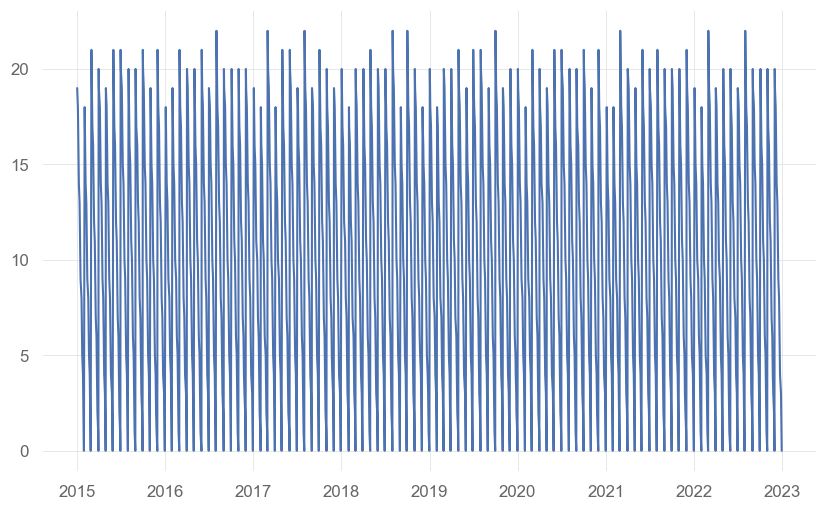

In [21]:
plt.plot(result['trading_days_til_month_end'])


In [22]:
import numpy as np
signal = np.where(result['trading_days_til_month_end'] <= 4, 1, np.where(result['trading_day_of_month'] <= 2, 1, 0))


In [23]:
result['My Indicator'] = signal



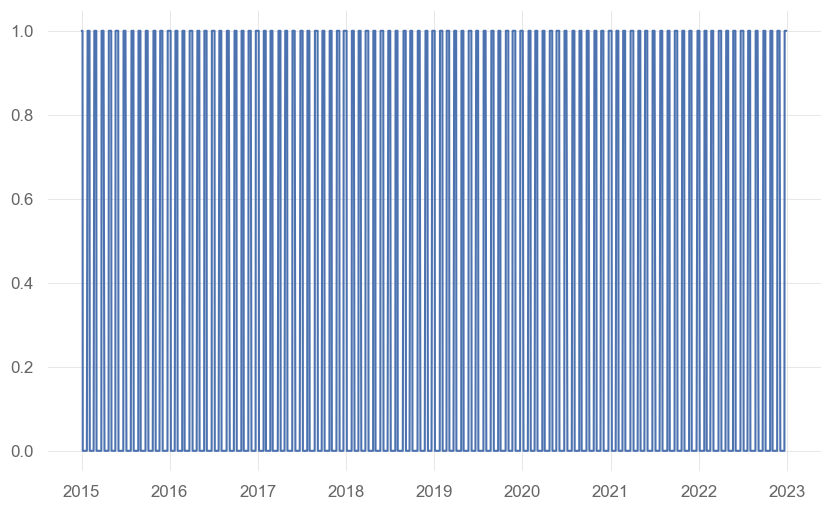

In [24]:
plt.plot(result['My Indicator'])



In [25]:
signals = mystrategy.get_signals(result, result['My Indicator'])



In [26]:
#signal = np.where(indicator == 1, , np.where(data.Close < indicator, -1, 0))
result['Signal'] = signal




In [28]:
mystrategy.get_equity_curve2(result)



,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Signal,Daily Returns,Cumulative Returns,Benchmark,trading_days_in_month,constant,trading_day_of_month,trading_days_til_month_end,My Indicator
Date,,,,,,,,,,,,,,,,,
2015-01-02 00:00:00-05:00,15.562255,15.642907,15.236035,15.425026,21171200,0.0,0.0,0.0,1,NaN,NaN,100.000000,20,1,1,19,1
2015-01-05 00:00:00-05:00,15.234830,15.262517,14.812310,14.862867,45052800,0.0,0.0,0.0,1,-0.036445,0.963555,96.355542,20,1,2,18,1
2015-01-06 00:00:00-05:00,14.923057,15.013340,14.443959,14.595634,58580800,0.0,0.0,0.0,0,-0.000000,0.963555,94.623073,20,1,3,17,0
2015-01-07 00:00:00-05:00,14.824349,15.008525,14.742493,14.959170,30749600,0.0,0.0,0.0,0,0.000000,0.963555,96.979872,20,1,4,16,0
2015-01-08 00:00:00-05:00,15.197516,15.515309,15.197516,15.485215,29434400,0.0,0.0,0.0,0,0.000000,0.963555,100.390205,20,1,5,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,43.830555,44.599162,43.451241,44.569218,5069600,0.0,0.0,0.0,1,0.011096,2.038211,288.940958,21,1,17,4,1
2022-12-27 00:00:00-05:00,44.539271,44.619128,43.810593,44.199886,2516300,0.0,0.0,0.0,1,-0.008287,2.021321,286.546593,21,1,18,3,1
2022-12-28 00:00:00-05:00,44.189907,44.649074,43.051970,43.101879,4785900,0.0,0.0,0.0,1,-0.024842,1.971108,279.428244,21,1,19,2,1


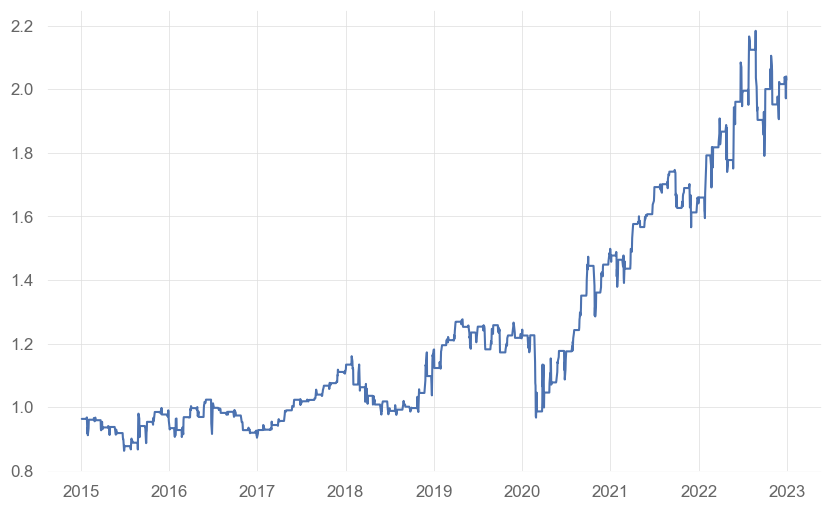

In [29]:
plt.plot(result['Cumulative Returns'])


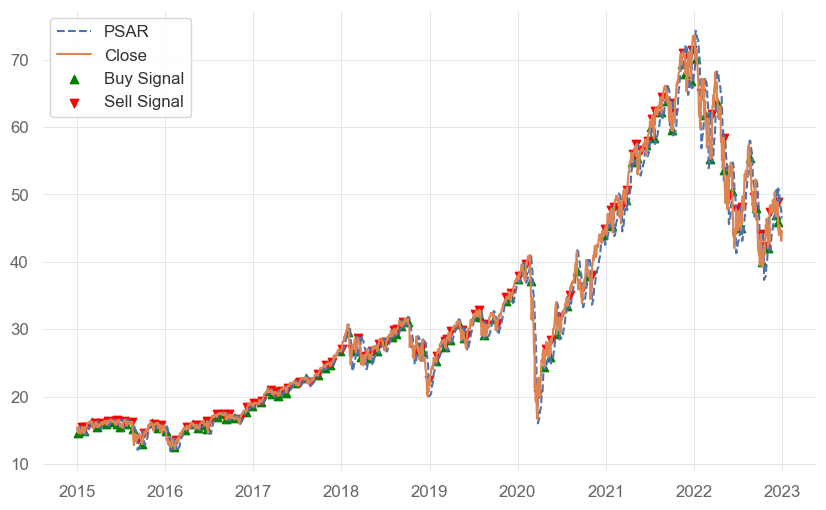

In [30]:
plt.plot(mypsar.index, mypsar.values, label='PSAR',linestyle='--' )
plt.plot(result.index, result.Close, label='Close')
# Find crossover points
cross_above = (mypsar > result.Close) & (mypsar.shift(1) <= result.Close.shift(1))
cross_below = (mypsar < result.Close) & (mypsar.shift(1) >= result.Close.shift(1))
# Plot green arrows for upward crossovers
plt.scatter(result.index[cross_above], result.Close[cross_above], marker='^', color='green', label='Buy Signal')
plt.scatter(result.index[cross_below], result.Close[cross_below], marker='v', color='red', label='Sell Signal')
plt.grid(True)
plt.legend()
plt.show()


In [32]:
result["trading_day_of_year"]=result.groupby(pd.Grouper(freq='Y'))[['constant']].cumsum()

In [33]:
result["trading_day_of_year"][152:]

Date
2015-08-11 00:00:00-04:00    153
2015-08-12 00:00:00-04:00    154
2015-08-13 00:00:00-04:00    155
2015-08-14 00:00:00-04:00    156
2015-08-17 00:00:00-04:00    157
                            ... 
2022-12-23 00:00:00-05:00    247
2022-12-27 00:00:00-05:00    248
2022-12-28 00:00:00-05:00    249
2022-12-29 00:00:00-05:00    250
2022-12-30 00:00:00-05:00    251
Name: trading_day_of_year, Length: 1862, dtype: int64

In [34]:
pick_dates = ((result["trading_day_of_year"] >= 50) & (result["trading_day_of_year"] <= 84)) | ((result["trading_day_of_year"] >= 93) & (result["trading_day_of_year"] <= 153)) | ((result["trading_day_of_year"] >= 188) & (result["trading_day_of_year"] <= 251))




In [35]:
signal = np.where(pick_dates== True, 1, 0)


In [36]:
signal

array([0, 0, 0, ..., 1, 1, 1])

In [41]:
result['Signal'] = signal
mystrategy.get_equity_curve2(result)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,Signal,Daily Returns,Cumulative Returns,Benchmark,trading_days_in_month,constant,trading_day_of_month,trading_days_til_month_end,My Indicator,trading_day_of_year
Date,,,,,,,,,,,,,,,,,,
2015-01-02 00:00:00-05:00,15.562255,15.642907,15.236035,15.425026,21171200,0.0,0.0,0.0,0,NaN,NaN,100.000000,20,1,1,19,1,1
2015-01-05 00:00:00-05:00,15.234830,15.262517,14.812310,14.862867,45052800,0.0,0.0,0.0,0,-0.000000,1.000000,96.355542,20,1,2,18,1,2
2015-01-06 00:00:00-05:00,14.923057,15.013340,14.443959,14.595634,58580800,0.0,0.0,0.0,0,-0.000000,1.000000,94.623073,20,1,3,17,0,3
2015-01-07 00:00:00-05:00,14.824349,15.008525,14.742493,14.959170,30749600,0.0,0.0,0.0,0,0.000000,1.000000,96.979872,20,1,4,16,0,4
2015-01-08 00:00:00-05:00,15.197516,15.515309,15.197516,15.485215,29434400,0.0,0.0,0.0,0,0.000000,1.000000,100.390205,20,1,5,15,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,43.830555,44.599162,43.451241,44.569218,5069600,0.0,0.0,0.0,1,0.011096,6.849900,288.940958,21,1,17,4,1,247
2022-12-27 00:00:00-05:00,44.539271,44.619128,43.810593,44.199886,2516300,0.0,0.0,0.0,1,-0.008287,6.793137,286.546593,21,1,18,3,1,248
2022-12-28 00:00:00-05:00,44.189907,44.649074,43.051970,43.101879,4785900,0.0,0.0,0.0,1,-0.024842,6.624383,279.428244,21,1,19,2,1,249


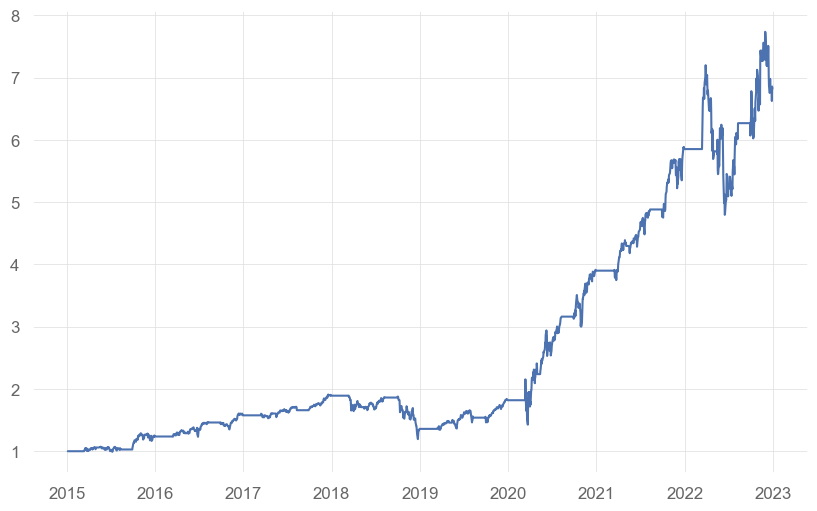

In [42]:
plt.plot(result['Cumulative Returns'])


SSO 2015-01-01 2023-01-01


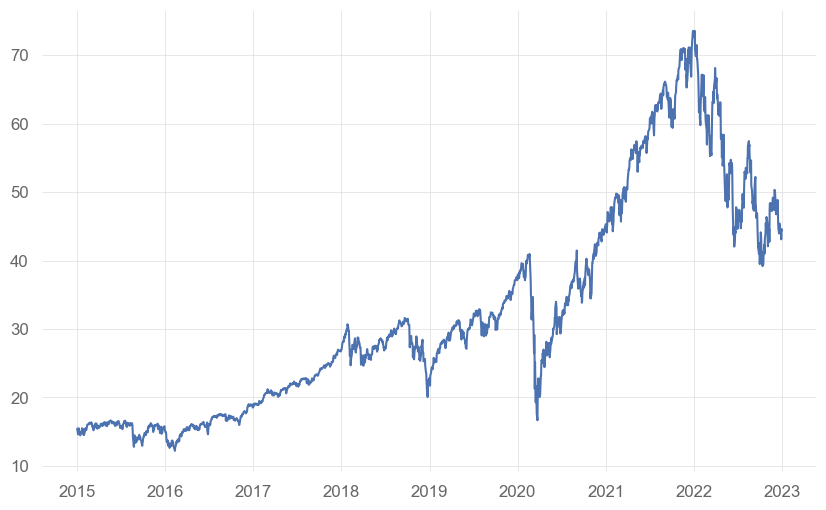

In [1]:
import matplotlib.pyplot as plt

import l

security_name = 'SSO'
start_date = '2015-01-01'
end_date = '2023-01-01'

mystrategy = l.OtherStrategy(security_name, start_date, end_date)
print(mystrategy.security_name, mystrategy.start, mystrategy.end)

result = mystrategy.download_data()
#mypsar = mystrategy.get_psar(result)
plt.plot(result.index, result.Close, label='Close')

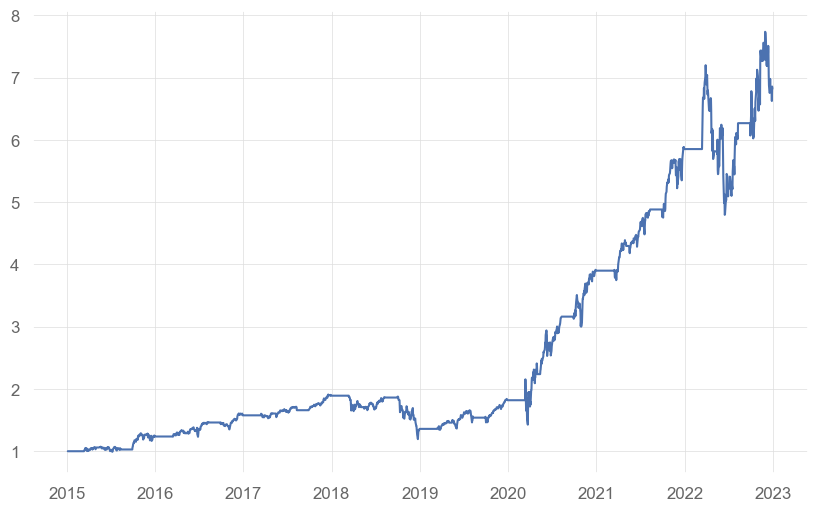

In [2]:
mystrategy.run()